#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Leitura do CSV

In [2]:
df = pd.read_csv('./dados.csv')

#### Exibição do dataset

Parece que os dados exibem dois comportamentos distintos: um comportamento semalhante à "constante" para x <= 4 e um comportamento "linear" para x > 4.

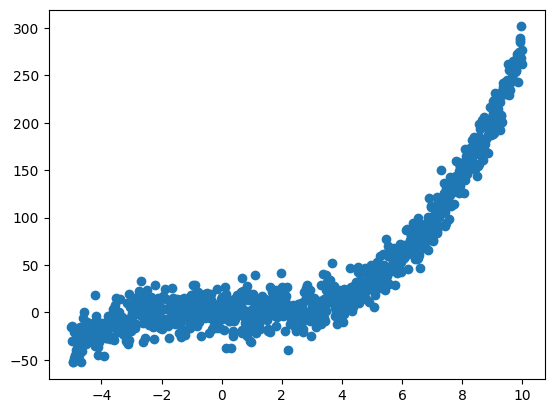

In [3]:
plt.scatter(df['x'], df['y'])
plt.show()

#### Boxplot

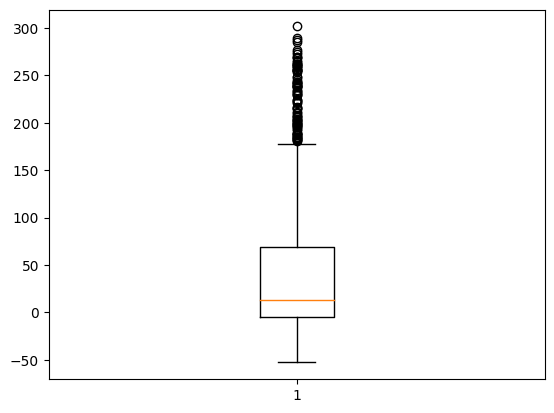

In [4]:
plt.boxplot(df['y'])
plt.show()

In [5]:
df.describe()

,x,y
count,1000.000000,1000.000000
mean,2.500000,44.434300
std,4.336628,75.936438
min,-5.000000,-52.754176
25%,-1.250000,-4.400160
50%,2.500000,12.831084
75%,6.250000,69.204468
max,10.000000,301.431823


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


#### Separação das variáveis

In [7]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### Separando variáveis de teste e treino

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,
y, test_size = 0.2, random_state = 0)

#### Aplicando modelo

In [10]:
regressor = LinearRegression()

In [11]:
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(x_test)

#### Visualizando resultado da predição

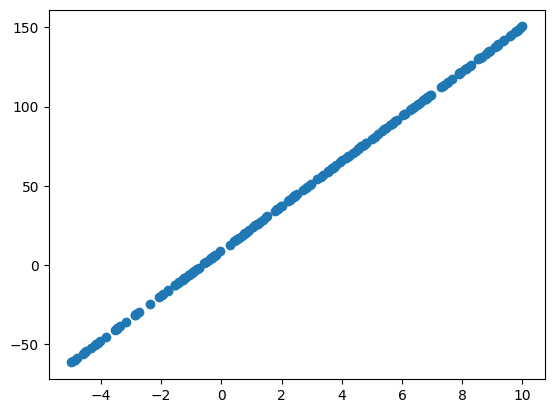

In [13]:
plt.scatter(x_test, y_pred)
plt.show()

### Métrica de Erro

In [14]:
r2 = r2_score(y_test, y_pred)
r2

0.7055351894580135

In [15]:
print("coeficiente angular (declividade da linha): ", regressor.coef_)
print("ponto onde y é interceptado: ", regressor.intercept_)
print("R2 Score: ", r2)

coeficiente angular (declividade da linha):  [14.14972194]
ponto onde y é interceptado:  9.058076328827838
R2 Score:  0.7055351894580135


#### Métrica de correlação

In [16]:
df.corr()

,x,y
x,1.000000,0.832131
y,0.832131,1.000000


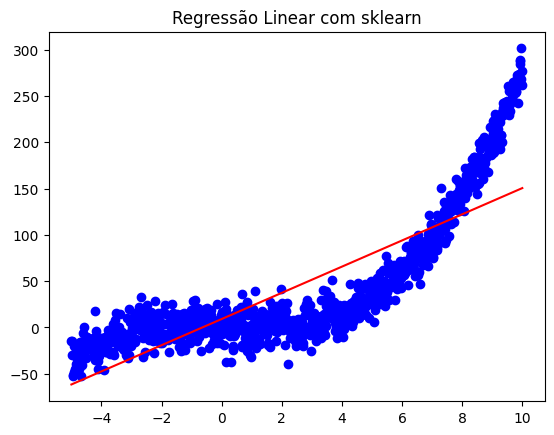

In [17]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

regression_line = slope * x + intercept

plt.scatter(x, y, color='blue', label='Dados')
plt.plot(x, regression_line, color='red', label='Regressão Linear')
plt.title('Regressão Linear com sklearn')
plt.show()

Parece que os dados exibem dois comportamentos distintos: um comportamento constante para x <= 4 e um comportamento linear para x > 4. A regressão linear, embora tenha uma alta correlação (0.832131) e um coeficiente de determinação (R²) de 0.70553, não captura adequadamente essa complexidade.

Apesar disso, com as ferramentas disponíveis, aplicamos técnicas como a regressão linear, mas pode ser que outro modelo seja mais adequado para explicar os dados. No entanto, dependendo das necessidades do negócio, a regressão linear pode ser suficiente, considerando seus índices de correlação e R² 